In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_10_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_10_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(130, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.2885 - accuracy: 0.8856 - val_loss: 0.2553 - val_accuracy: 0.8947
Epoch 2/100
100000/100000 - 1s - loss: 0.2363 - accuracy: 0.9019 - val_loss: 0.2204 - val_accuracy: 0.9060
Epoch 3/100
100000/100000 - 2s - loss: 0.1997 - accuracy: 0.9133 - val_loss: 0.1894 - val_accuracy: 0.9163
Epoch 4/100
100000/100000 - 2s - loss: 0.1688 - accuracy: 0.9239 - val_loss: 0.1646 - val_accuracy: 0.9247
Epoch 5/100
100000/100000 - 1s - loss: 0.1460 - accuracy: 0.9343 - val_loss: 0.1467 - val_accuracy: 0.9342
Epoch 6/100
100000/100000 - 1s - loss: 0.1280 - accuracy: 0.9431 - val_loss: 0.1307 - val_accuracy: 0.9427
Epoch 7/100
100000/100000 - 1s - loss: 0.1145 - accuracy: 0.9503 - val_loss: 0.1197 - val_accuracy: 0.9485
Epoch 8/100
100000/100000 - 1s - loss: 0.1038 - accuracy: 0.9557 - val_loss: 0.1101 - val_accuracy: 0.9544
Epoch 9/100
100000/100000 - 1s - loss: 0.0944 - accuracy: 0.9602 - val_loss: 0.1052 - val_accu

Epoch 77/100
100000/100000 - 1s - loss: 0.0121 - accuracy: 0.9956 - val_loss: 0.0473 - val_accuracy: 0.9872
Epoch 78/100
100000/100000 - 1s - loss: 0.0140 - accuracy: 0.9950 - val_loss: 0.0374 - val_accuracy: 0.9885
Epoch 79/100
100000/100000 - 1s - loss: 0.0147 - accuracy: 0.9947 - val_loss: 0.0324 - val_accuracy: 0.9894
Epoch 80/100
100000/100000 - 2s - loss: 0.0111 - accuracy: 0.9958 - val_loss: 0.0304 - val_accuracy: 0.9902
Epoch 81/100
100000/100000 - 2s - loss: 0.0096 - accuracy: 0.9964 - val_loss: 0.0324 - val_accuracy: 0.9901
Epoch 82/100
100000/100000 - 1s - loss: 0.0110 - accuracy: 0.9960 - val_loss: 0.0326 - val_accuracy: 0.9900
Epoch 83/100
100000/100000 - 1s - loss: 0.0123 - accuracy: 0.9956 - val_loss: 0.0328 - val_accuracy: 0.9897
Epoch 84/100
100000/100000 - 1s - loss: 0.0111 - accuracy: 0.9960 - val_loss: 0.0331 - val_accuracy: 0.9902
Epoch 85/100
100000/100000 - 1s - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0313 - val_accuracy: 0.9902
Epoch 86/100
100000/100000 -

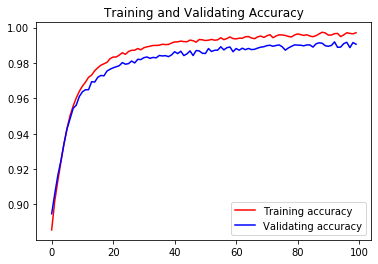

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_10_4_model.h5')